COPYRIGHT © 2018 Kiran Arun <kironni@gmail.com>

### Setup

In [21]:
# install dependencies
!rm -r Neural_Networks-101-demo
!git clone https://github.com/KiranArun/Neural_Networks-101-demo.git
!python3 /content/Neural_Networks-101-demo/scripts/setup.py

Cloning into 'Neural_Networks-101-demo'...
remote: Counting objects: 208, done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 208 (delta 94), reused 152 (delta 49), pack-reused 0
Receiving objects: 100% (208/208), 1.68 MiB | 21.27 MiB/s, done.
Resolving deltas: 100% (94/94), done.


# MNIST Handwritten Digits Classifier

In [0]:
import keras                       # import keras, our machine learning library
import numpy as np                 # import numpy, our linear algebra library
import matplotlib.pyplot as plt    # import matplotlib, our graph plotting library

In [23]:
# this is the directory where we will keep and external files, eg. data, logs
model_root_dir = '/content/Neural_Networks-101-demo/'

# get data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(model_root_dir+'MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /content/Neural_Networks-101-demo/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /content/Neural_Networks-101-demo/MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /content/Neural_Networks-101-demo/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /content/Neural_Networks-101-demo/MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
image_size = 28         # image dimension size, using square images
num_classes = 10        # number of different digits written

In [0]:
batch_size = 100        # number of images fed in to each training step
learning_rate = 0.5     # learning rate

epochs = 2              # number of times we feed in the data set

In [0]:
# reset session
# this is so you dont have to reset kernal and run whole notebook
# you can run from here to give keras and tensorflow a blank canvas
keras.backend.clear_session()

In [27]:
# create model
model = keras.models.Sequential()

# a single fully connected layer with softmax activation
model.add(keras.layers.Dense(units=num_classes,
                             activation='softmax',
                             input_shape=(image_size**2,)))

# show model structure
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
# define loss function
# define optimizer
# also return accuracy as a performance metric
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=learning_rate),
              metrics=['accuracy'])

In [29]:
# train model
history = model.fit(x=mnist.train.images, y=mnist.train.labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(mnist.validation.images, mnist.validation.labels))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 2s 45us/step - loss: 0.4022 - acc: 0.8850 - val_loss: 0.3014 - val_acc: 0.9172
Epoch 2/2
55000/55000 [==============================] - 3s 50us/step - loss: 0.3103 - acc: 0.9121 - val_loss: 0.2832 - val_acc: 0.9220


In [30]:
# show evaluation accuracy
score = model.evaluate(mnist.test.images, mnist.test.labels, verbose=0)
print('Test accuracy:', str(round(100*score[1],2))+'%')

Test accuracy: 91.73%


prediction: 2 answer: 2
0 0.151%
1 0.002%
2 97.558%
3 0.221%
4 0.0%
5 0.263%
6 1.688%
7 0.0%
8 0.117%
9 0.0%


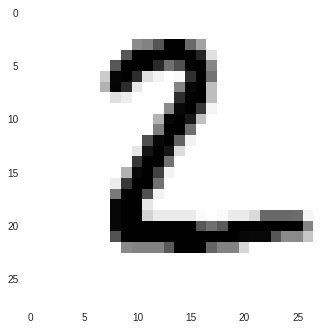

prediction: 6 answer: 6
0 0.146%
1 0.025%
2 3.432%
3 0.344%
4 0.217%
5 0.054%
6 85.456%
7 0.002%
8 10.308%
9 0.017%


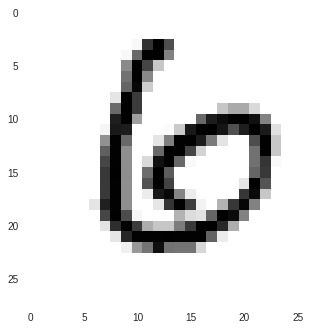

In [31]:
# test and show test images
test_idxs = [1,11]

for test_idx in test_idxs:
    test_x, test_y = mnist.test.images[test_idx].reshape(1,-1), mnist.test.labels[test_idx].reshape(1,-1)

    _prediction = model.predict(test_x)

    print('prediction:', np.argmax(_prediction), 'answer:', np.argmax(test_y))

    for i,val in enumerate(_prediction[0]):
        print(i, str(round((100*val),3))+'%')

    plt.imshow(test_x.reshape(image_size,image_size), cmap='binary')
    plt.grid(False)
    plt.show()